# Summary of Wine Dataset Analysis and KNN Model Performance

## Dataset Information
- Shape of the dataframe: (178, 13)
- Shape of data: (178, 13)
- Shape of target: (178,)
- Most strongly correlated features to the target: Flavanoids, Total Phenols, OD280/OD315 of diluted wines

## KNN Model Performance
- Accuracy: 96%
- Precision: 96%
- Recall: 97%
- F1 Score: 96%


# Wine Dataset Multi-class Classification Summary

This Jupyter notebook presents a multi-class classification analysis of the Wine dataset as provided by scikit-learn. The analysis consists of several key steps, each documented and executed using Python and the scikit-learn library.

## Data Import and Initial Analysis
The dataset was imported, and an initial analysis was conducted to understand its structure. The dataset consists of various chemical analyses of wines grown in the same region in Italy but derived from three different cultivars. The initial analysis included:
- Determining the shape of the dataset
- Computing descriptive statistics for the features (minimum, maximum, average values)
- Visualizing the relationships between features using a scatter matrix
- Identifying correlations among the features and with the target variable

## Data Pre-processing
The data was pre-processed to prepare it for the classification task. This involved:
- Standardizing the feature values to have a mean of zero and a variance of one
- Splitting the dataset into training and testing subsets

## Model Development and Evaluation
A K-Nearest Neighbors (KNN) model was developed and trained on the dataset. The model's performance was evaluated using various metrics:
- The confusion matrix provided insight into the true positive and negative rates, as well as the misclassification between the wine classes.
- The model achieved an accuracy of 96%, with precision, recall, and F1 scores as follows:
  - Precision: 96%
  - Recall 97%
  - F1 Score: 96%

The high-level metrics indicate a robust model performance, with specific strengths and areas for improvement discussed within the notebook.

---

**Notebook created by:** Caroline
**Team number:** 9
**Assignment:** #u9_terre_assign2.ipynb


In [40]:
!pip install scikit-learn


In [41]:
!pip install pandas


In [42]:
!pip install pyarrow
!pip install matplotlib
!pip install seaborn


import pandas as pd


In [43]:
from sklearn.datasets import load_wine


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Load the wine dataset
wine = load_wine()


In [44]:
# Convert to DataFrame for easier analysis
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_target = pd.DataFrame(wine.target, columns=['target'])

# Output the shape of the dataset
print(f"Shape of the dataframe: {wine_df.shape}")
print(f"Shape of data: {wine.data.shape}")
print(f"Shape of target: {wine.target.shape}")


Shape of the dataframe: (178, 13)
Shape of data: (178, 13)
Shape of target: (178,)


In [45]:
# Describe the dataset (min, max, average)
print(wine_df.describe())


          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

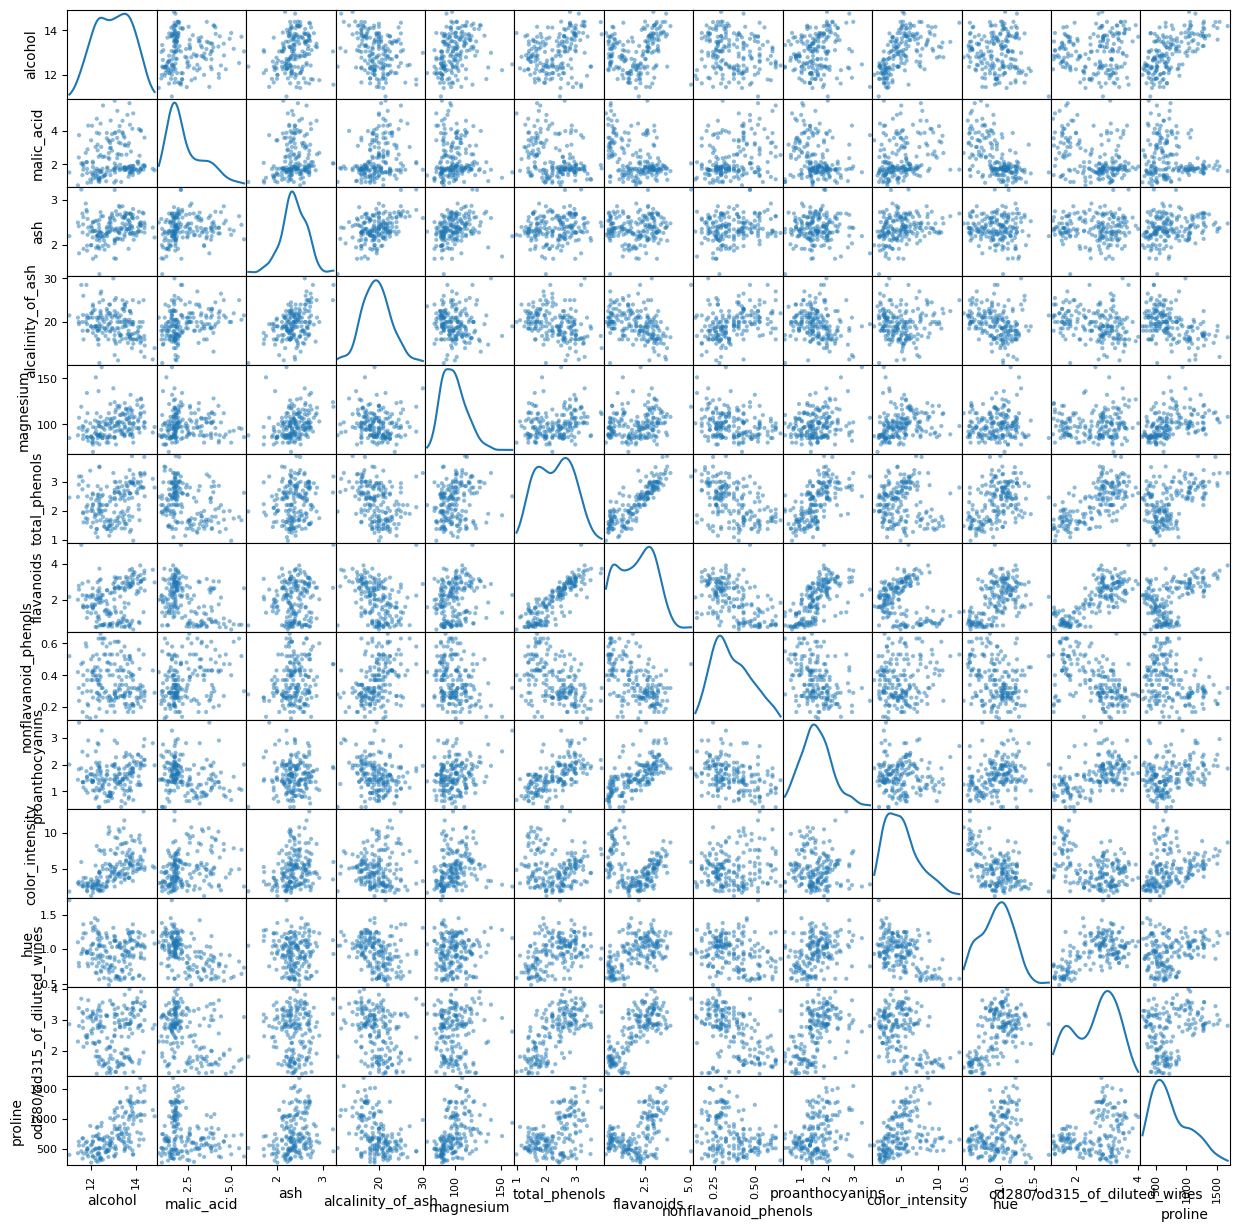

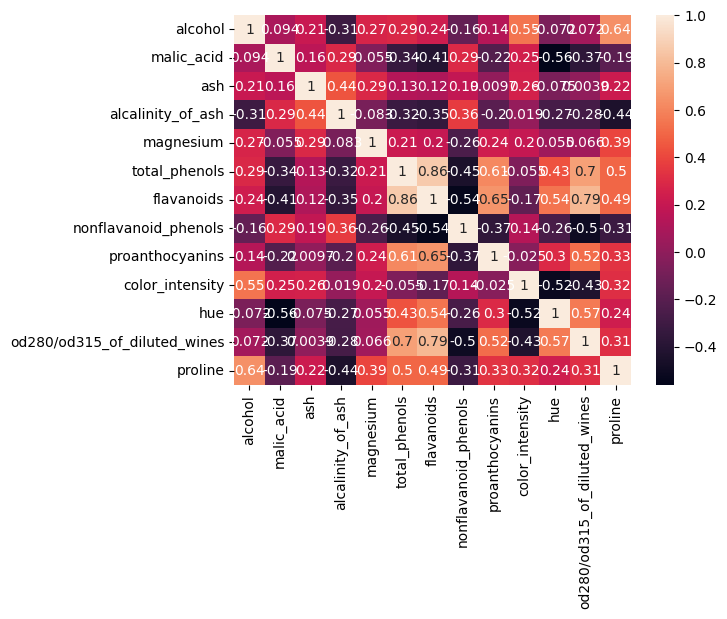

total_phenols                 flavanoids       0.864564
od280/od315_of_diluted_wines  flavanoids       0.787194
                              total_phenols    0.699949
dtype: float64


In [46]:
# Draw scatter matrix
from pandas.plotting import scatter_matrix

scatter_matrix(wine_df, figsize=(15, 15), diagonal='kde')
plt.show()

# Execute corr() and analyze correlations
correlations = wine_df.corr()
sns.heatmap(correlations, annot=True)
plt.show()

# Determine strongly correlated features
print(correlations.abs().unstack().sort_values(ascending=False).drop_duplicates()[1:4])


In [47]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
wine_df_scaled = scaler.fit_transform(wine_df)

# Data is now ready for classification model


In [48]:
# Pre-processing the data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit to the data and transform
wine_df_scaled = scaler.fit_transform(wine_df)

# Model training and performance evaluation
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine_df_scaled, wine.target, test_size=0.3, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate performance metrics
report = classification_report(y_test, y_pred, target_names=wine.target_names)
print("Classification Report:")
print(report)


Confusion Matrix:
[[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]
Classification Report:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      0.90      0.95        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

